BZAN 542

Charles Liu

In [1]:
library(cluster)
library(ggdendro)
library(dbscan)
library(kernlab)

# Data

In [2]:
nld <- data.frame(x1=numeric(), x2=numeric())
nld

x1,x2
<dbl>,<dbl>


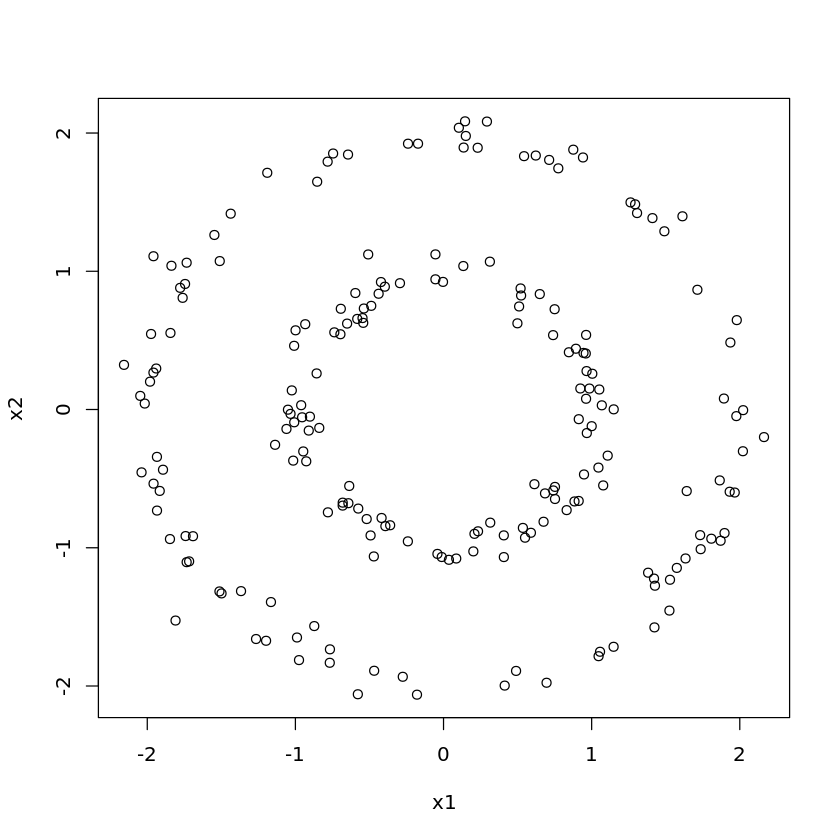

In [3]:
set.seed(542)
n <- 100
theta <- runif(n, 0, 2*pi)
radius <- rnorm(n, 1, 0.1)
nld[1:100, 1] <- radius*cos(theta)
nld[1:100, 2] <- radius*sin(theta)
theta <- runif(n, 0, 2*pi)
radius <- rnorm(n, 2, 0.1)
nld[101:200, 1] <- radius*cos(theta)
nld[101:200, 2] <- radius*sin(theta)
plot(nld)

# KMeans

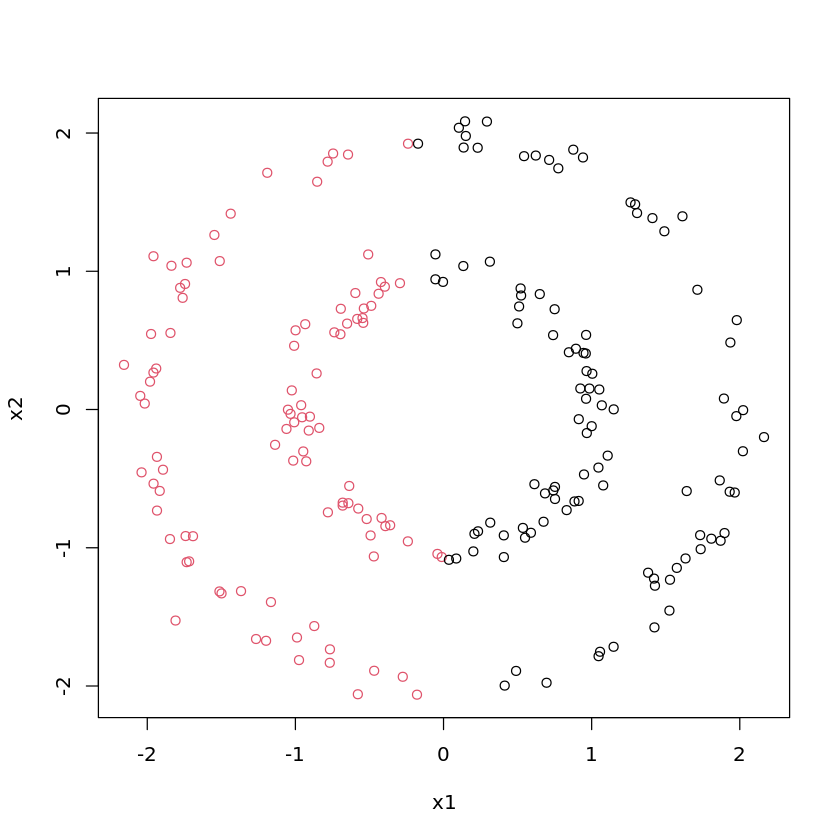

In [4]:
fit.kmeans <- kmeans(nld, centers = 2, nstart = 10)$cluster
plot(nld, col = fit.kmeans)

# Hierarchical Clustering

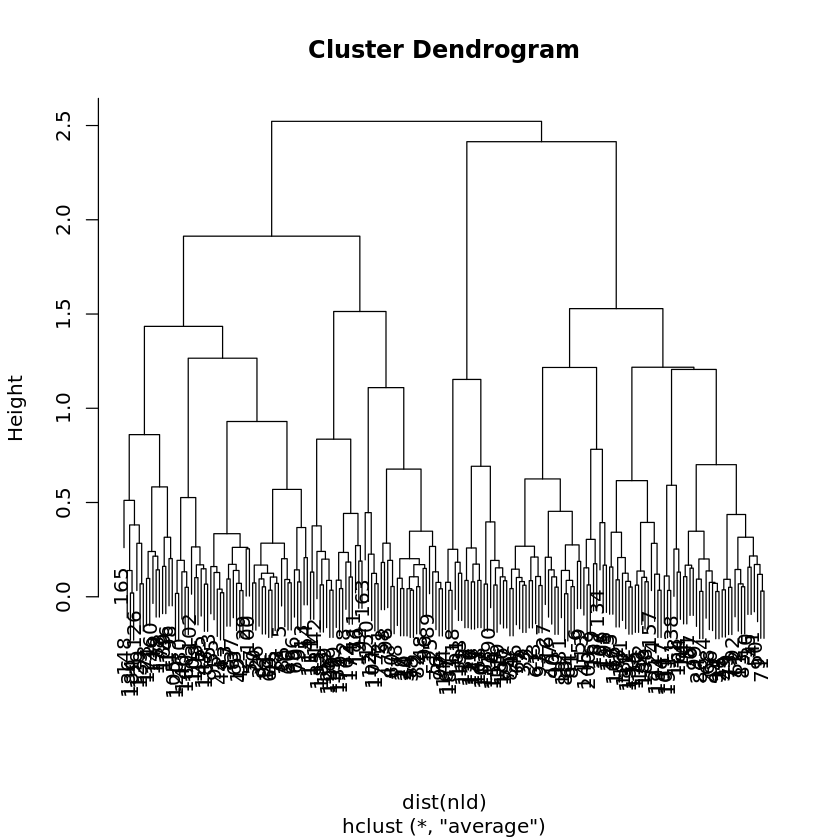

In [5]:
hc <- hclust(dist(nld), method = "average")
plot(hc)

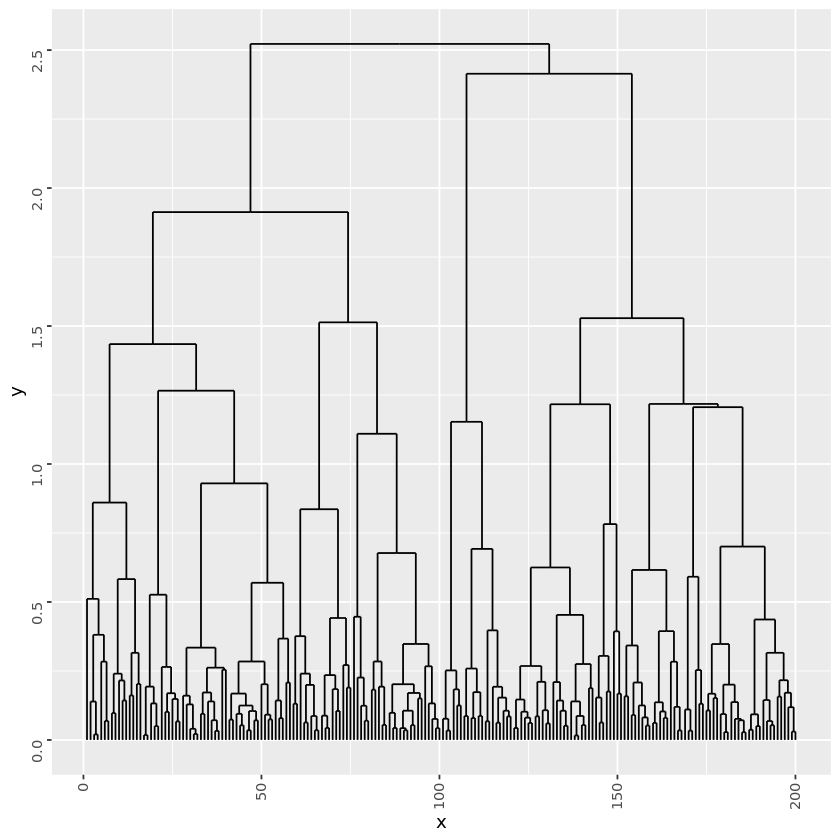

In [6]:
ggdendrogram(hc, labels = FALSE, theme_dendro = FALSE)

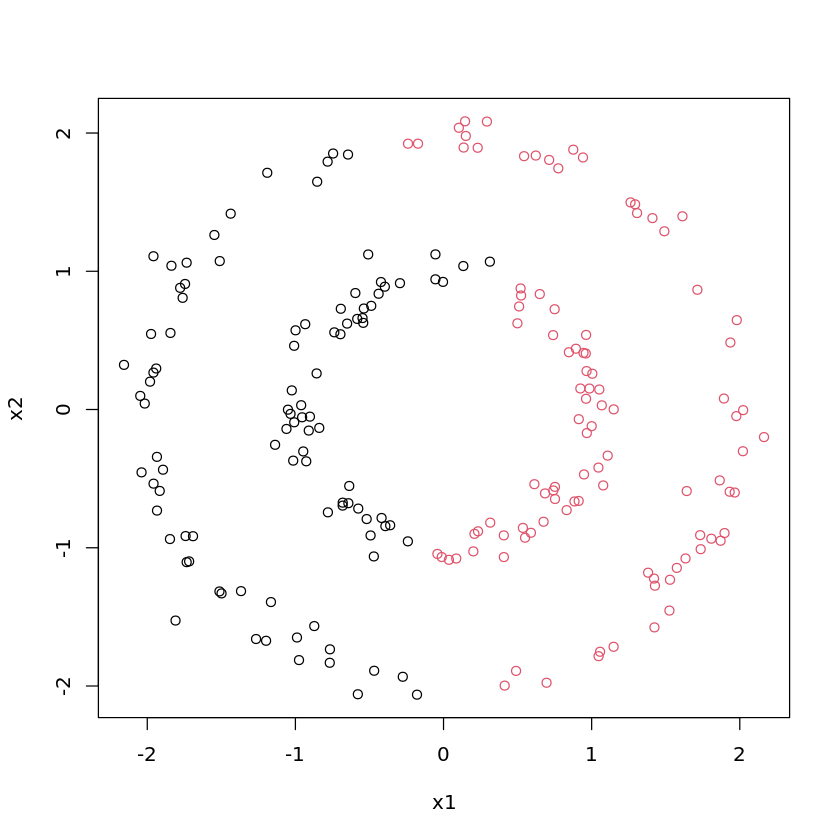

In [7]:
fit.hc <- cutree(hc, k = 2)
plot(nld, col = fit.hc)

This doesn't look good ...

# DBSCAN

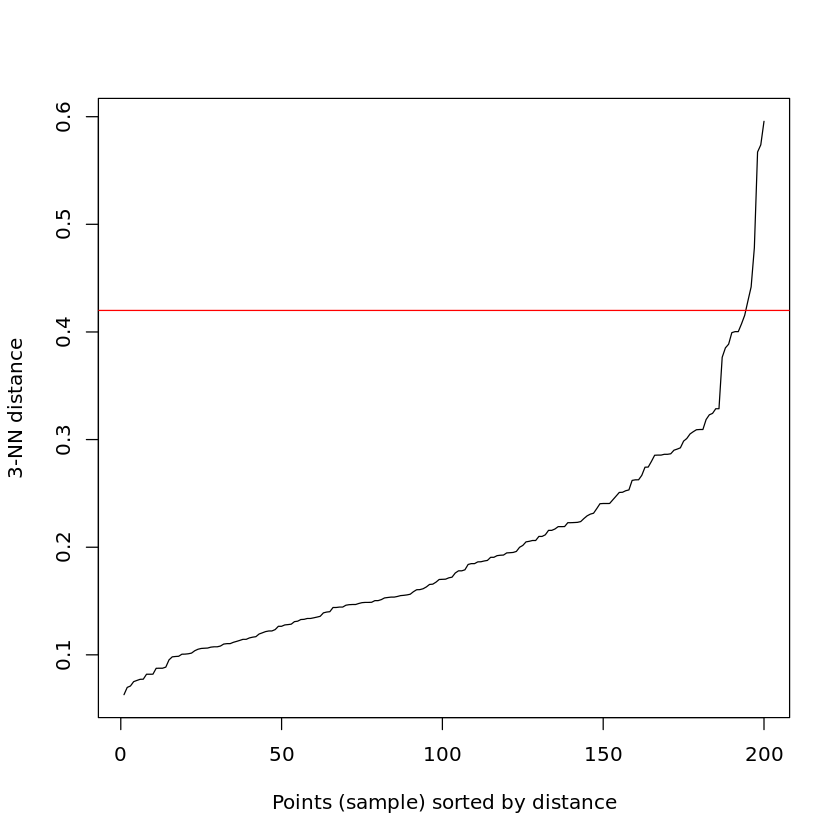

In [8]:
kNNdistplot(nld, k = 3)
abline(h = 0.42, col = "red")

In [9]:
db <- dbscan(nld, eps = .42, minPts = 4)
db

DBSCAN clustering for 200 objects.
Parameters: eps = 0.42, minPts = 4
The clustering contains 4 cluster(s) and 2 noise points.

  0   1   2   3   4 
  2 100   6  63  29 

Available fields: cluster, eps, minPts

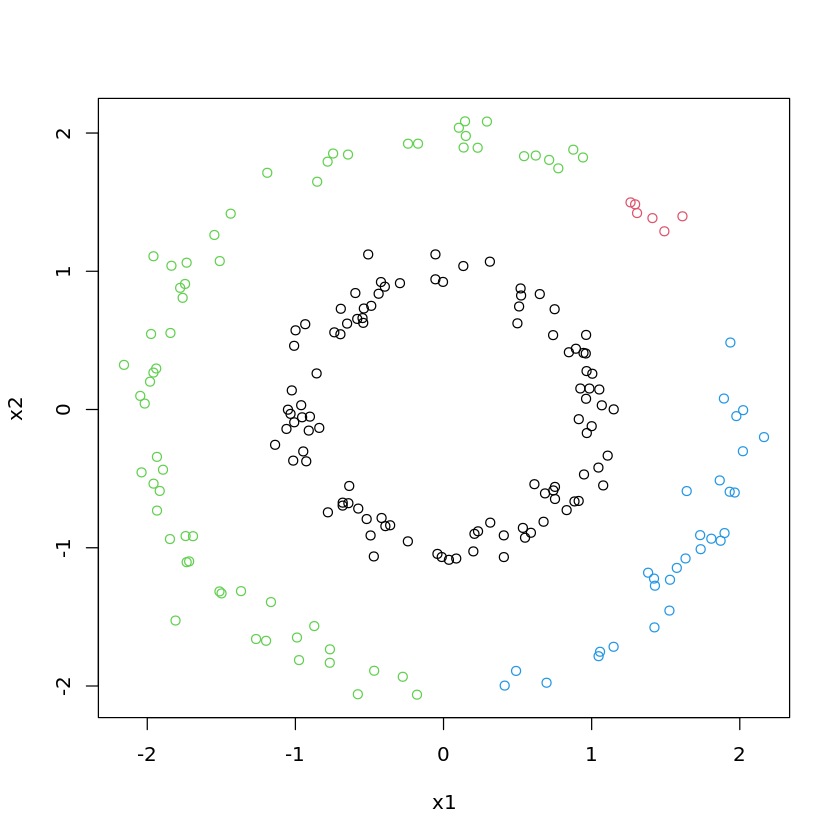

In [10]:
fit.db <- db$cluster
plot(nld, col = fit.db)

Not bad !!!

# Spectral Clustering

Spectral Clustering object of class "specc" 

 Cluster memberships: 
 
2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
 
Gaussian Radial Basis kernel function. 
 Hyperparameter : sigma =  15 

Centers:  
            [,1]        [,2]
[1,] -0.09120596 -0.05610114
[2,]  0.02086051 -0.05650479

Cluster size:  
[1] 100 100

Within-cluster sum of squares:  
[1] 399.8053 102.5800


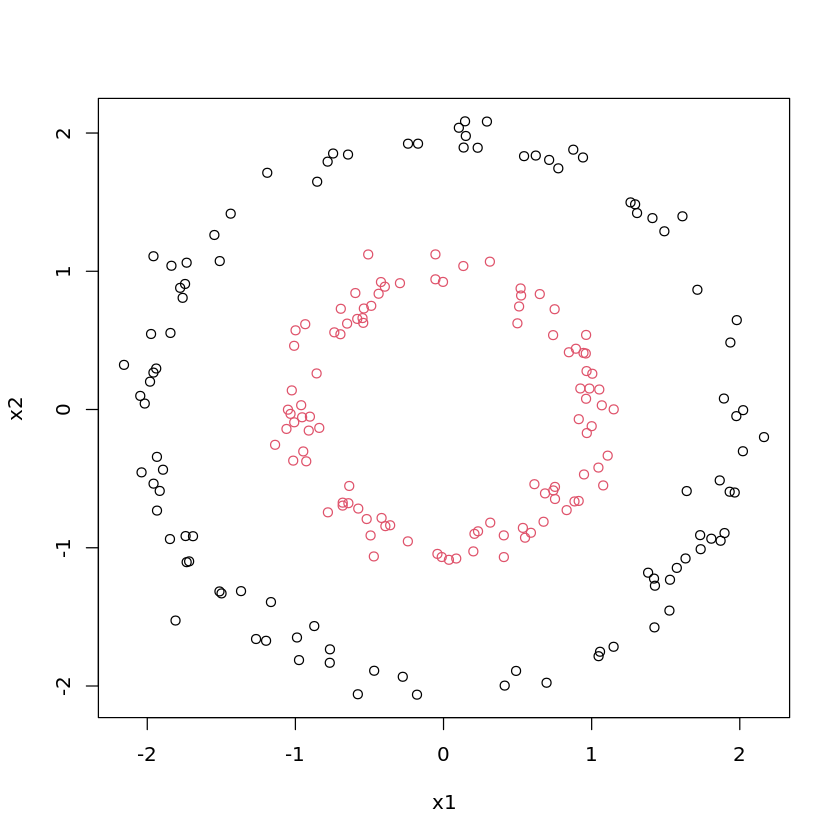

In [11]:
fit.specc <- specc(as.matrix(nld), centers = 2, kernel = 'rbfdot', kpar=list(sigma=15))
fit.specc
plot(nld, col = fit.specc)

# Validation

In [12]:
d <- dist(nld)
fpc::cluster.stats(d, fit.kmeans)

0.00000000,0.05252211
0.05252211,0.00000000
0.000000,2.529578
2.529578,0.000000
